## Content

- Gradient Descent Revision
- Define Linear Regression class
 - code for helper functions - predict, score
- Optimization

- Implementing Gradient Descent

 - model.fit
- Plotting  loss function and weights with iteration
- How feature scaling helps easier model training


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/731/original/z.png?1705225160' width=800>

## Gradient Descent Revision

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/732/original/z.png?1705225281' width=800>




<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/733/original/z.png?1705225316' width=800>

## Linear Regression



Let's define our Linear Regression class and some helper functions to help us with the code

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/914/original/download_%288%29.jpeg?1723532761' width=800>


In [ ]:
import numpy as np
class LinearRegression() :
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate = learning_rate
    self.iterations = iterations

Next we define our predict function.

It's simply $X*W + b$

In [ ]:
def predict(self, X):
  return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/915/original/download_%289%29.jpeg?1723532785' width=800>


Finally we define our evaluation metric, R2 Score

In [ ]:
def r2_score(self, X, y):
  y_ = predict(self,X)
  ss_res = np.sum((y-y_)**2)
  ss_tot = np.sum((y- y.mean())**2)
  score = (1- ss_res/ss_tot)
  return score

LinearRegression.score=r2_score

## Optimization

Now, we come to our main task of training the model.

If you remember,
- our objective was to find the hyperplane in $d+1$ dimensions
- such that this is very close to the $d+1$ dimensional points.

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/734/original/z.png?1705225418' width=800>

#### How do we write it as an optimization problem?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/735/original/z.png?1705225452' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/736/original/z.png?1705225492' width=800>

#### Geometric Intuition of Minima in Loss function/ Optimization equation

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/737/original/z.png?1705225524' width=800>

Geometrically, we are trying to finding the global minimal of the loss function

- In 2D, let's think of this like a parabola.
- Our aim is to find the global minimal point of this parabola.


### Solving the optimization equation

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/738/original/z.png?1705225559' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/739/original/z.png?1705225604' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/740/original/z.png?1705225634' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/741/original/z.png?1705225666' width=800>

### Calculate the gradient

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/742/original/z.png?1705225705' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/743/original/z.png?1705225736' width=800>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/744/original/z.png?1705225769' width=800>

#### How to update the weights now?

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/745/original/z.png?1705225797' width=800>




<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/061/746/original/z.png?1705225831' width=800>


**What is the importance of learning rate (α/η)?**

α/η is considered as a step size which when iterated over will reach minima of the cost function.

- Since Learning rate defines the size of a jump or step size.
  - Too small a value -> the updates will happen very slowly.
  - A large value -> it may overshoot the minima.

- Then we have to iterate back again to reach the minimum. At times it results in oscillations back and forth.

- One hack that you can do is we should decrease the value of η as iteration increases. This helps to reach minima more easily and not overshoot.

## Implementation of weights update using gradient descent, and fit function

Let's code the weights updation function now


<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/085/917/original/download_%2810%29.jpeg?1723532929' width=800>

In [ ]:
def update_weights(self):
  Y_pred = self.predict( self.X )
  # calculate gradients
  dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
  db = - 2*np.sum(self.Y - Y_pred)/self.m
  # update weights
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

LinearRegression.update_weights=update_weights

**Note:**
- Using 1 point of updation is called stochastic gradient descent.
- Whereas if we update the weights after m points, it's called batch gradient descent.

Now finally, since we have all the required functions, </br>
let's code the `fit` function now to fit our model to our data.

In [ ]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.X = X
  self.Y = Y
  self.error_list=[]
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)
  return self

LinearRegression.fit=fit

Let's train our model now on our data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 25.0MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train)

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942184

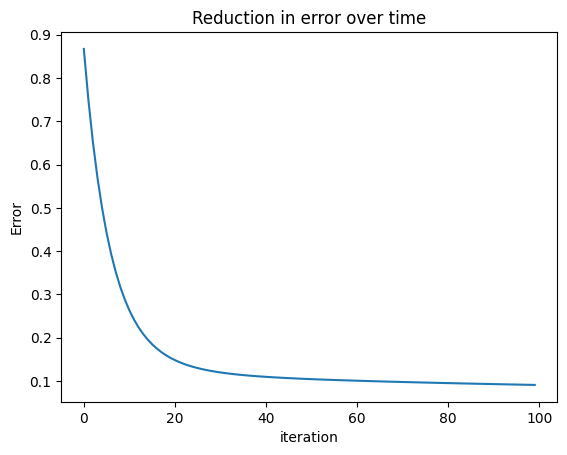

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

#### Extra Read - Normal Eq (optional)

https://colab.research.google.com/drive/1x1DAjYu6WgXgnKihmbGjSAvez2G6eBR_?usp=drive_link